# Loans: The Financial Two-Way gift between Savers and Borrowers
## by Ahmad Alashmony

## Preliminary Wrangling

#### Had you ever tried to take a loan from any resource, ex. a Family member, a Friend, your Boss, your mates or even the place you work. It's not easy for anyone to borrow or to lend but, for financial institutions it's totally different. Moving money forward in time (Saving) and getting money backward in time (Borrowing) is the core business here. But There's Some Questions to answer here like:

1. Who to lend?
2. How much risk would I face?
3. What's the suitable (Expected Return) to face those risks?
4. Can Diversification grow-up my return (on Actual Basis not just as expected)?
5. What's the Maximum (Expected Return) for each industry?

#### Who want to get the most suitable return on his investment, must study the return and the risk and make a portfolio diversified well to have the best mix. This rule contains all financial institutions incluing commercial banks, They have to diversify their loan portfolio. This database contains the majour data that affect such financial decisions like Credit Quality which describe risk, Interest rates which describe the return, reason of loan, Loan Amount, Borrower State, Borrower Occupation and the customer's Employment status duration those can help to make diversified portfolio based on borrowers data and some other data like Location, and The pupose of loan and so on. Here's the most important analysis can start. 

#### More and more Questions like this can be answered using Financial data Analysis. In this database which contains about 114K records about loans I'll get more data about the Borrower, the Customers and maybe some Economic conditions.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#read file
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


# Summary of Findings

1. Changing Risk Rating methods might affect financial decision in negative way and can lead to lose more customers or gain more profit.

2. Changing loan properities to satisfy customers needs and abilities (Like debt consolidation) will help to keep customers performing well and growing economy.

3. Defaulting is not related to customer proprieties such as risk rating and Employment duration not to Loan properities such as Amount, reason or even interest rates applied to it.

4. Collaterals are important, it's your guarantee.  

## 1. Changing Risk Rating methods might affect financial decision in negative way and can lead to lose more customers or gain more profit.

#### What's the affect of Credit Quality on Interest rate, We have 2 Credit rating methods (Before and after 2009):

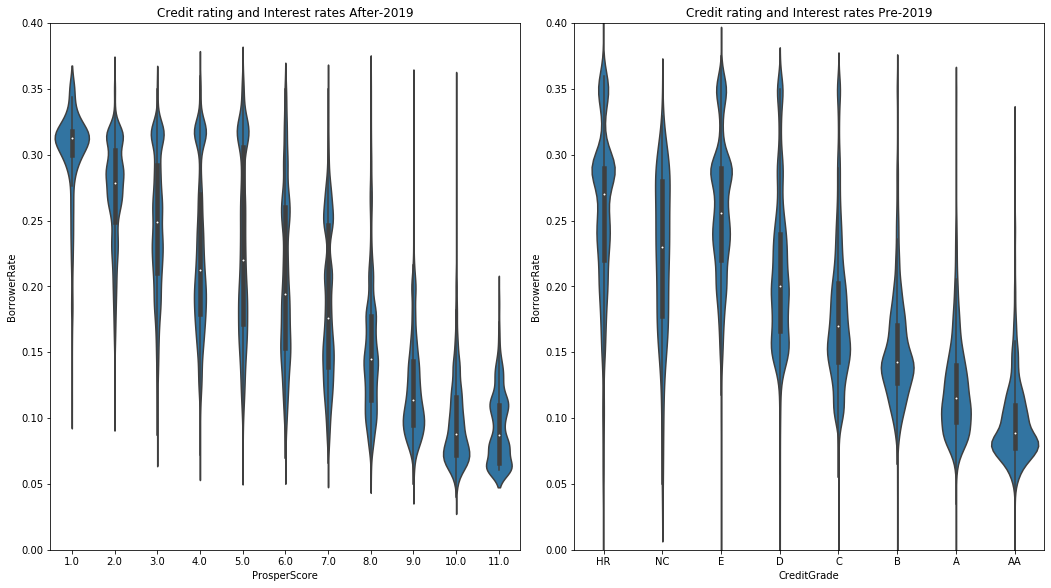

In [3]:
#I'll make two violin plots containing Interest Rates applied on each Risk rating level
# Plots will be diversified based on the rating method used
plt.figure(figsize = [14.70, 8.27])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 2)
sort_cre_rat = ['HR','NC','E','D','C','B','A','AA',] 
sb.violinplot(data = df, x = 'CreditGrade', y = 'BorrowerRate', color = base_color, order =sort_cre_rat)
plt.title('Credit rating and Interest rates Pre-2019');
plt.ylim(0,0.4);


plt.subplot(1, 2, 1)
sb.violinplot(data = df, x = 'ProsperScore', y = 'BorrowerRate', color = base_color)
g=plt.title('Credit rating and Interest rates After-2019');
plt.ylim(0,0.4);

plt.tight_layout();


**It's very clear how credit Quality affect and Interest rates are related which affect income and risk in pur portfolio.**

#### What's the rating of defaulting customers, for pre and after Jun 2009 credit rating methods:

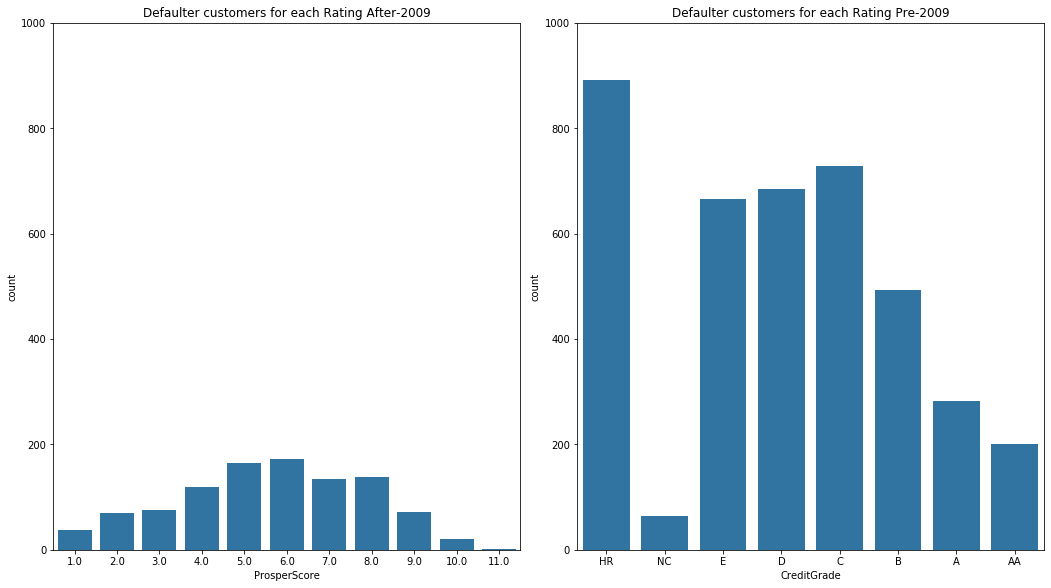

In [4]:
#I'll make Bar plots containing Number of defaulted loans applied on each Risk rating level
# Plots will be diversified based on the rating method used
plt.figure(figsize = [14.70, 8.27])
base_color = sb.color_palette()[0]
defaulted = df.query('LoanStatus == "Defaulted"')

plt.subplot(1, 2, 2)
sort_cre_rat = ['HR','NC','E','D','C','B','A','AA',] 
sb.countplot(data = defaulted, x = 'CreditGrade', color = base_color, order =sort_cre_rat)
plt.title('Defaulter customers for each Rating Pre-2009');
plt.ylim(0,1000);



plt.subplot(1, 2, 1)
sb.countplot(data =defaulted, x = 'ProsperScore', color = base_color)
g=plt.title('Defaulter customers for each Rating After-2009');
plt.ylim(0,1000);
plt.tight_layout();


**Defaulting is related on the Old Risk Rating method more than the new one, which means we have to be aware that there's something wrong with our new risk rating method or this might be because we made a good Debt Reconsolidation agreements with them.**

## 2. Changing loan properities to satisfy customers needs and abilities (Like debt consolidation) will help to keep customers performing well and growing economy.

In [5]:
## I'll make a new df with categories:
List_num = np.arange(0,21,1)
List_name = ['Not Available','Debt Consolidation','Home Improvement','Business','Personal Loan','Student Use','Auto','Other','Baby&Adoption','Boat','Cosmetic Procedure','Engagement Ring','Green Loans','Household Expenses','Large Purchases','Medical/Dental','Motorcycle','RV','Taxes','Vacation','Wedding Loans']
lcdf=pd.DataFrame(data = {'List_num': List_num, 'ListingCat': List_name})
df_cat = df.join(lcdf, on='ListingCategory (numeric)')
df_cat['ListingCat'].value_counts() , df['ListingCategory (numeric)'].value_counts()


(Debt Consolidation    58308
 Not Available         16965
 Other                 10494
 Home Improvement       7433
 Business               7189
 Auto                   2572
 Personal Loan          2395
 Household Expenses     1996
 Medical/Dental         1522
 Taxes                   885
 Large Purchases         876
 Wedding Loans           771
 Vacation                768
 Student Use             756
 Motorcycle              304
 Engagement Ring         217
 Baby&Adoption           199
 Cosmetic Procedure       91
 Boat                     85
 Green Loans              59
 RV                       52
 Name: ListingCat, dtype: int64, 1     58308
 0     16965
 7     10494
 2      7433
 3      7189
 6      2572
 4      2395
 13     1996
 15     1522
 18      885
 14      876
 20      771
 19      768
 5       756
 16      304
 11      217
 8       199
 10       91
 9        85
 12       59
 17       52
 Name: ListingCategory (numeric), dtype: int64)

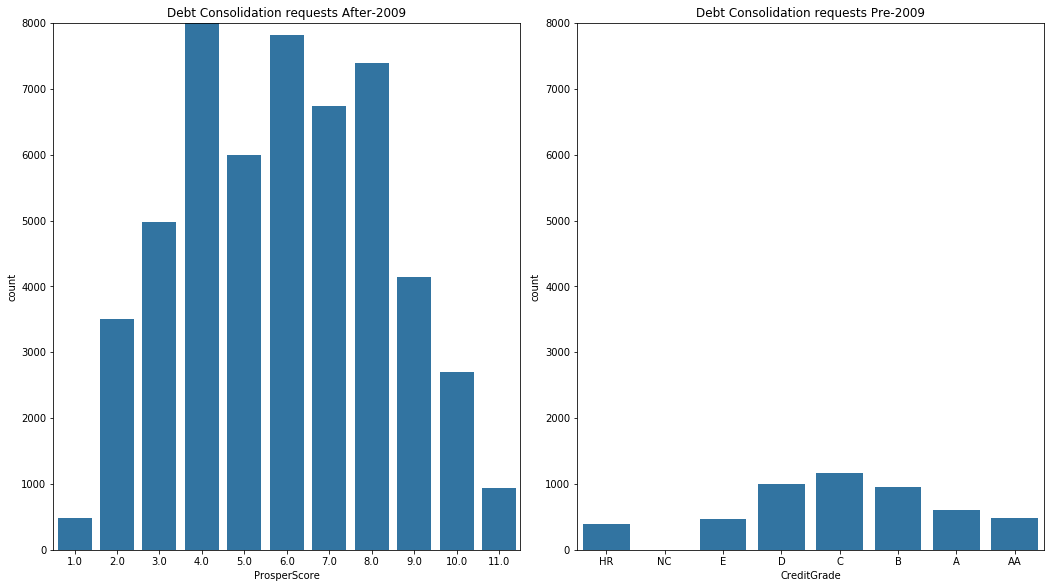

In [6]:
#I'll make Bar plots containing Number of defaulted Debt consolidation applied on each Risk rating level
# Plots will be diversified based on the rating method used:

plt.figure(figsize = [14.70, 8.27])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 2)
sort_cre_rat = ['HR','NC','E','D','C','B','A','AA',] 
sb.countplot(data = df_cat.query('ListingCat == "Debt Consolidation"'), x = 'CreditGrade', color = base_color, order =sort_cre_rat)
plt.title('Debt Consolidation requests Pre-2009');
plt.ylim(0,8000);



plt.subplot(1, 2, 1)
sb.countplot(data = df_cat.query('ListingCat == "Debt Consolidation"'), x = 'ProsperScore', color = base_color)
g=plt.title('Debt Consolidation requests After-2009');
plt.ylim(0,8000);
plt.tight_layout();


**Here's a useful info, most of those requests accepted after changing the calculation method on different credit rating levels but, this change came after the World Financial Crises. What's the real reason for this growth?. It's Normal to find the customers with Very High Credit Rating less in Debt Consolidation requests (according to their high solvency) and the customers with very low credit Rating less also as they might default before they can request, we can check it in Multivariate Exploration stage.**

#### Does this mean that they will default, let's check the defaulting loans:

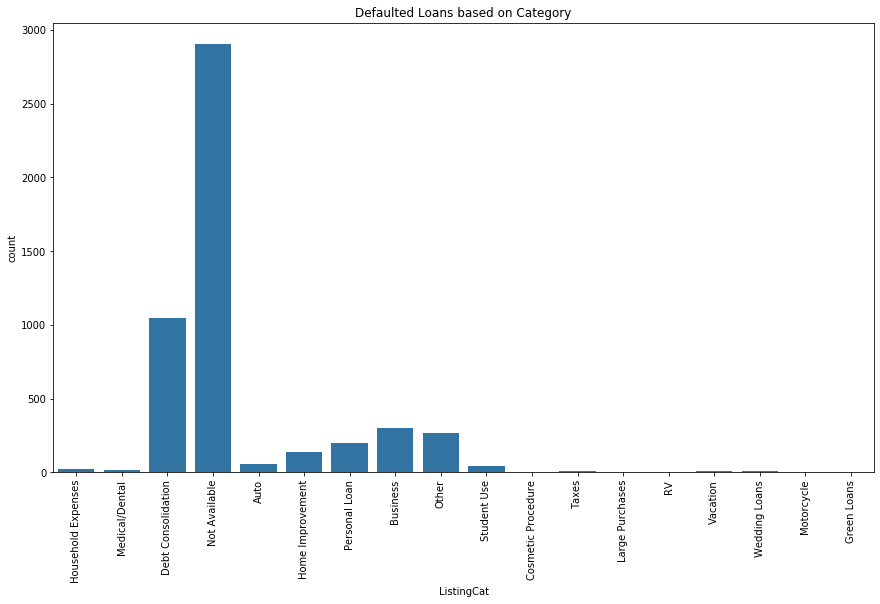

In [7]:
# I'll Plot the count of defaulted loans based on their Categories:
plt.figure(figsize = [14.70, 8.27])
main_defaulted=df_cat.query('LoanStatus == "Defaulted"')
ax = sb.countplot(data = main_defaulted, x = 'ListingCat', color=base_color);
#ax.legend(loc = 1, ncol = 1, framealpha = 1, title = 'cat_var2');

plt.title('Defaulted Loans based on Category');
plt.xticks(rotation = 90);


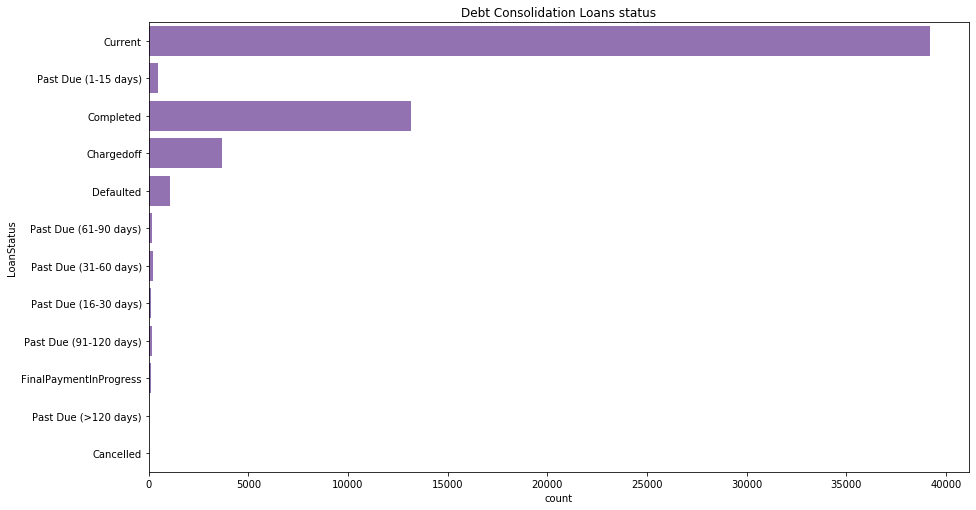

In [8]:
# I'll Plot the count of Debt Consolidation loans per their Status:

plt.figure(figsize = [14.70, 8.27])
baseColor = sb.color_palette()[4]
Cons = df_cat.query('ListingCat == "Debt Consolidation"')
ax = sb.countplot(data = Cons, y = 'LoanStatus', color=baseColor);
plt.title('Debt Consolidation Loans status');


**The most defaulted loans was N/A, The Debt Consolidation came in the second one but it's customers are still performing well, (as the propotion of their count is high related to otherm it's expected that their dafaulting count is higher).**

## 3. Defaulting is not related to customer proprieties such as risk rating and Employment duration not to Loan properities such as Amount, reason or even interest rates applied to it:

#### We will check what's the relation between defaulting and:

#### Borrower State:

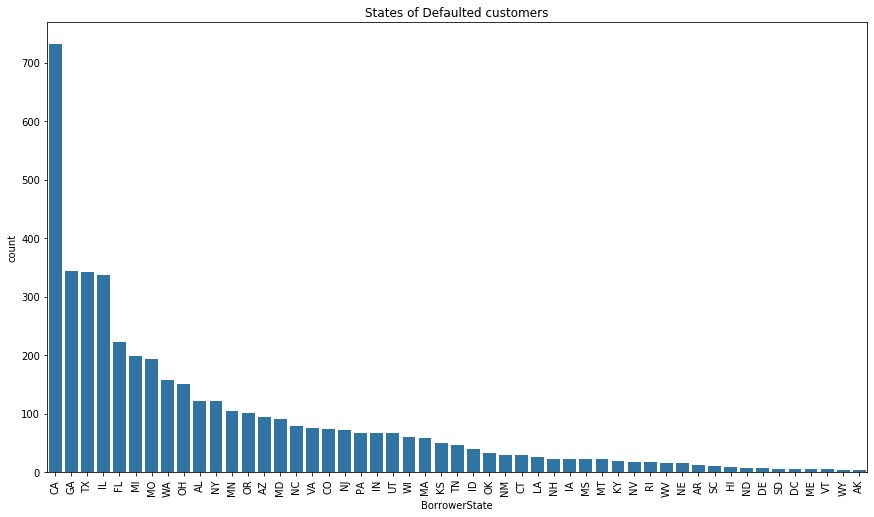

In [9]:
# I'll Plot States of Defaulted customers

plt.figure(figsize = [14.70, 8.27])
baseColor = sb.color_palette()[0]
sort= df.BorrowerState.value_counts().index
defaulted = df.query('LoanStatus == "Defaulted"')
sort= defaulted.BorrowerState.value_counts().index
ax = sb.countplot(data = defaulted, x = 'BorrowerState', color=baseColor, order = sort);
plt.title('States of Defaulted customers');
plt.xticks(rotation=90);


**The most states in loans, seems like to be the most to default.**

#### What's the rating of defaulting customers, for pre and after Jun 2009 credit rating methods:

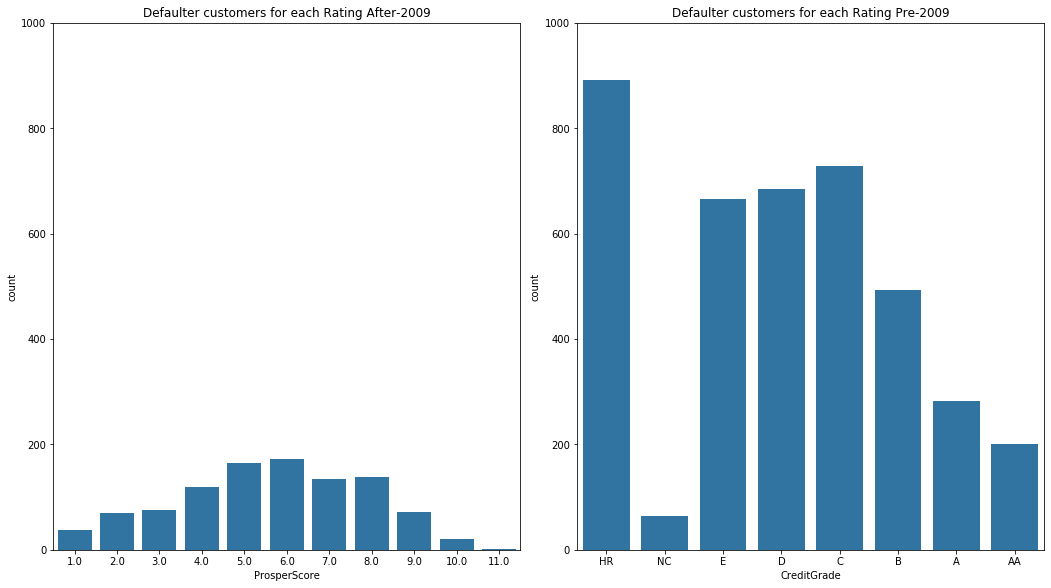

In [10]:
#I'll make Bar plots containing Number of defaulted Debt consolidation applied on each Risk rating level
# Plots will be diversified based on the rating method used:

plt.figure(figsize = [14.70, 8.27])
base_color = sb.color_palette()[0]
defaulted = df.query('LoanStatus == "Defaulted"')

plt.subplot(1, 2, 2)
sort_cre_rat = ['HR','NC','E','D','C','B','A','AA',] 
sb.countplot(data = defaulted, x = 'CreditGrade', color = base_color, order =sort_cre_rat)
plt.title('Defaulter customers for each Rating Pre-2009');
plt.ylim(0,1000);



plt.subplot(1, 2, 1)
sb.countplot(data =defaulted, x = 'ProsperScore', color = base_color)
g=plt.title('Defaulter customers for each Rating After-2009');
plt.ylim(0,1000);
plt.tight_layout();


**It's related on the Old Risk Rating method more than the new one, Or might be because we made a good Debt Reconsolidation agreements with them.**

#### Who are the most defaulters?

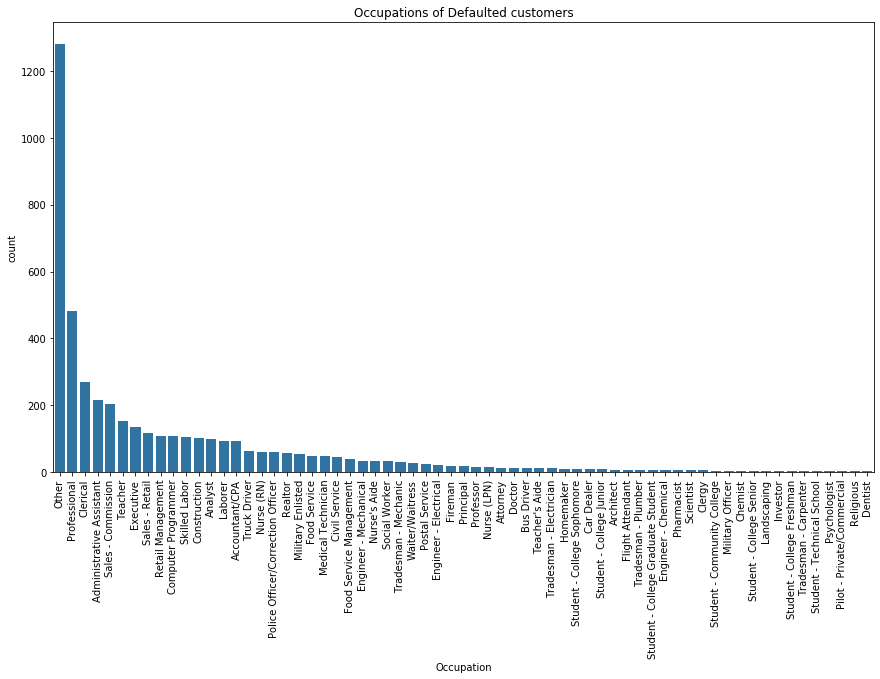

In [11]:
#I'll make count plot for eatch ocuupation who defaulted:
plt.figure(figsize = [14.70, 8.27])
baseColor = sb.color_palette()[0]
defaulted = df.query('LoanStatus == "Defaulted"')

sort= defaulted.Occupation.value_counts().index
ax = sb.countplot(data = defaulted, x = 'Occupation', color=baseColor, order = sort);
plt.title('Occupations of Defaulted customers');
plt.xticks(rotation=90);


**Others and professionals are still on the top, The top borrowers and the top defaulters.**


#### Is it more related to the duration they had in their jobs?

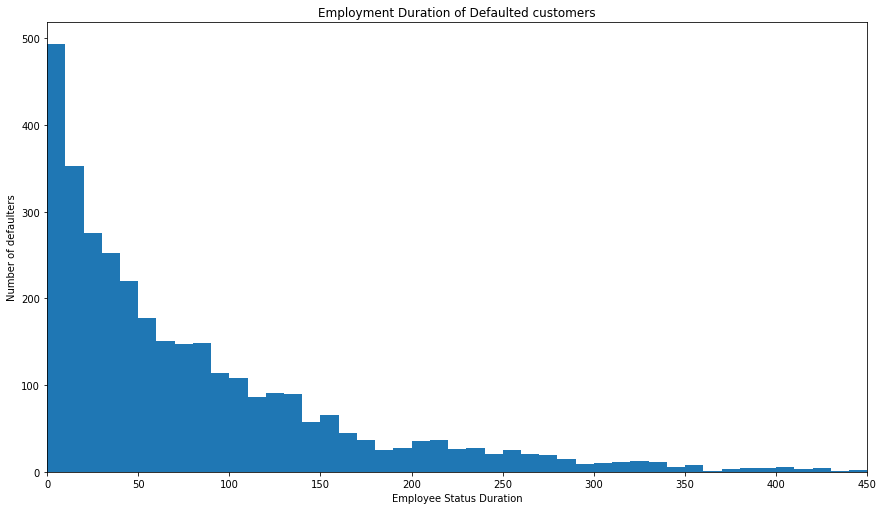

In [12]:
# I'll make a hist for each defaulted Employment Status Duration (per 10 months):

plt.figure(figsize = [14.70, 8.27])
baseColor = sb.color_palette()[0]
defaulted = df.query('LoanStatus == "Defaulted"')
step= 10
bins = np.arange(0,defaulted.EmploymentStatusDuration.max()+step,step)

sort= defaulted.EmploymentStatusDuration.value_counts().index
plt.hist(data = defaulted, x = 'EmploymentStatusDuration', color=baseColor, bins =bins );
plt.title('Employment Duration of Defaulted customers');
plt.xlim(0,450);
plt.xlabel('Employee Status Duration');
plt.ylabel('Number of defaulters');


**It's better to look here, Older Employees has better salaries and also has a stable job and their possibility to default is lower.**

#### Is there any relation between defaulting and the high interest rates on every loan amount?

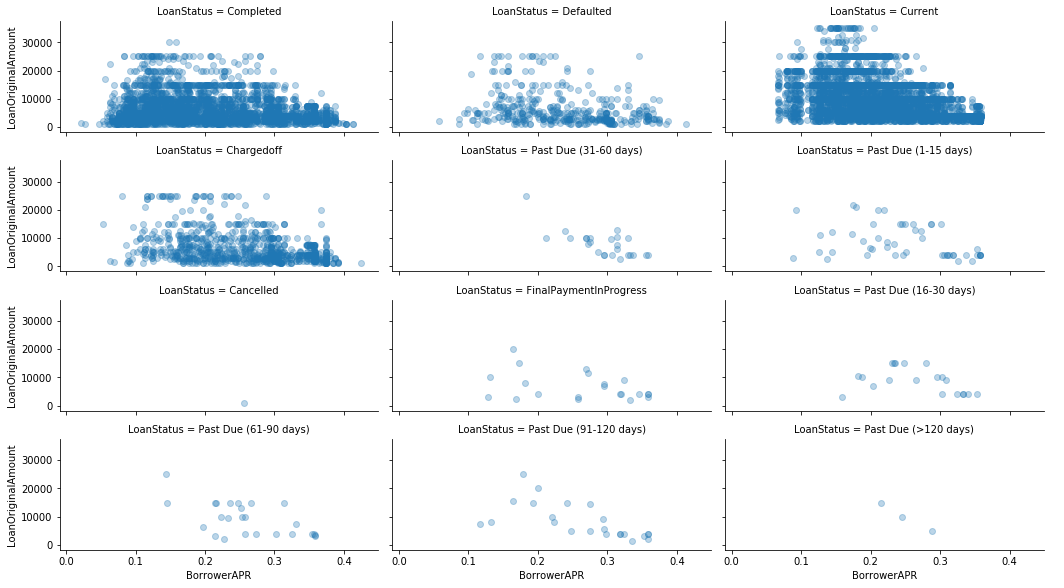

In [13]:
# I'll make FacetGrid to based on Loan Status, every plot will Considers the rate applied on Loan Amount

sample =df_cat.sample(9000) 
g = sb.FacetGrid(data = sample, col = 'LoanStatus', height = 8.27/4, col_wrap=3, 
                 aspect = (14.70/3)/(8.27/4), palette = 'colorblind');             
g.map(plt.scatter, 'BorrowerAPR', 'LoanOriginalAmount', alpha = .3);

g.add_legend();


**Although There's a very few loans defaulted for amounts higher than 25K and interest rates lower than 10% and although  They had not also charged off, It seems like there's no relation as the Loans above 25K are actually too few in the database and most interest rates over 10%.**

## Collaterals are important, it's your guarantee:

#### Now, It's the time to find out what's the importance of providing income verification to the Loan Amount and the Interest rate!


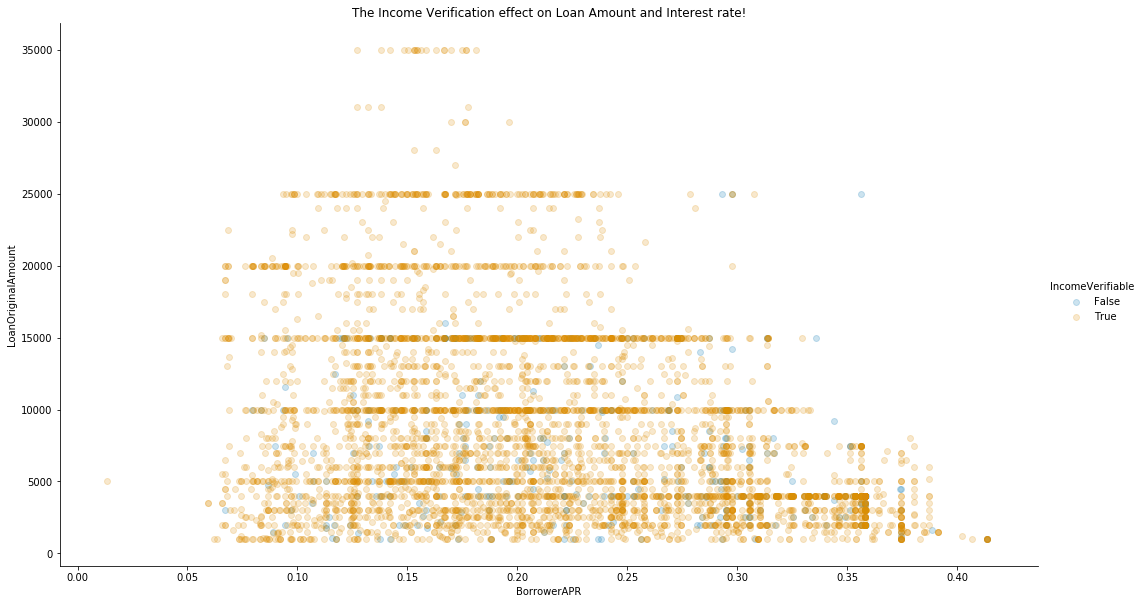

In [14]:
# I'll make FacetGrid to based on Which the Income was verified or not 
# The plot will show the interest rates and Loan Amounts for each

sample=df.sample(5000)
g = sb.FacetGrid(data = sample, hue = 'IncomeVerifiable', height = 8.27,  aspect = 14.70/8.27,
                 palette = 'colorblind');
g.map(plt.scatter, 'BorrowerAPR', 'LoanOriginalAmount',alpha =.2);
g.add_legend();
plt.title('The Income Verification effect on Loan Amount and Interest rate!');


**It's still not clear as on very small loans the interest rates is related to many other factors, Let's see it on higher values:**

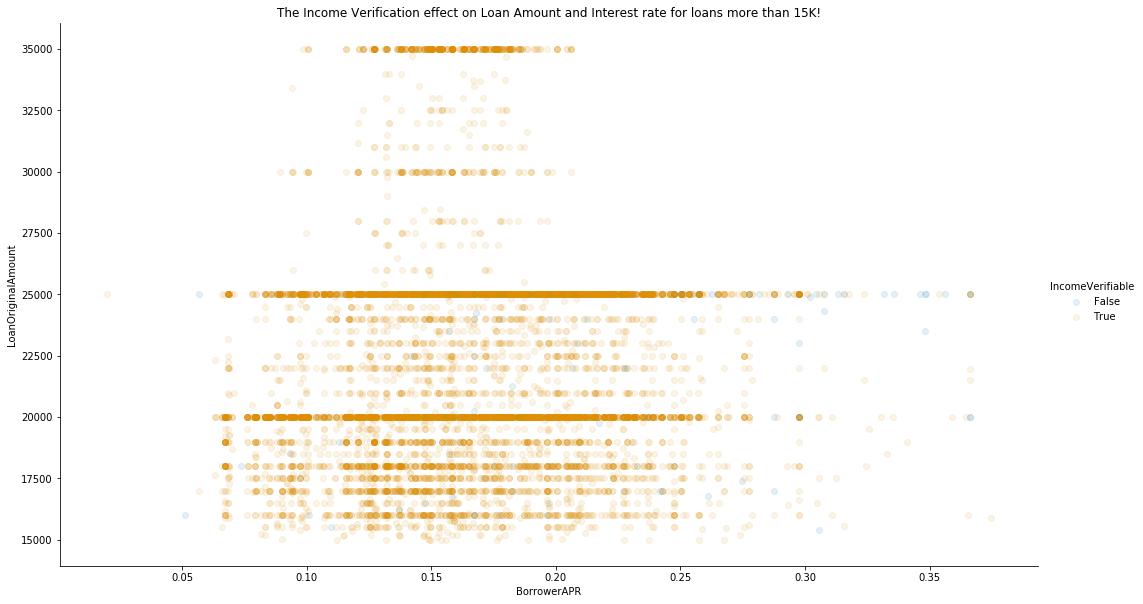

In [15]:
# I'll make FacetGrid to based on Which the Income was verified or not 
# The plot will show the interest rates and Loan Amounts more than 15K 

sample=df.query('LoanOriginalAmount>15000')
g = sb.FacetGrid(data = sample, hue = 'IncomeVerifiable', height = 8.27,  aspect = 14.70/8.27,
                 palette = 'colorblind');
g.map(plt.scatter, 'BorrowerAPR', 'LoanOriginalAmount',alpha =.1);
g.add_legend();
plt.title('The Income Verification effect on Loan Amount and Interest rate for loans more than 15K!');


**Income verification is very required for loans above 25K, and it's very expected to get a lower Interest rate if I have income approval**

#### And what's the importance of providing a collateral like mortgage to the Loan Amount and the Interest rate!

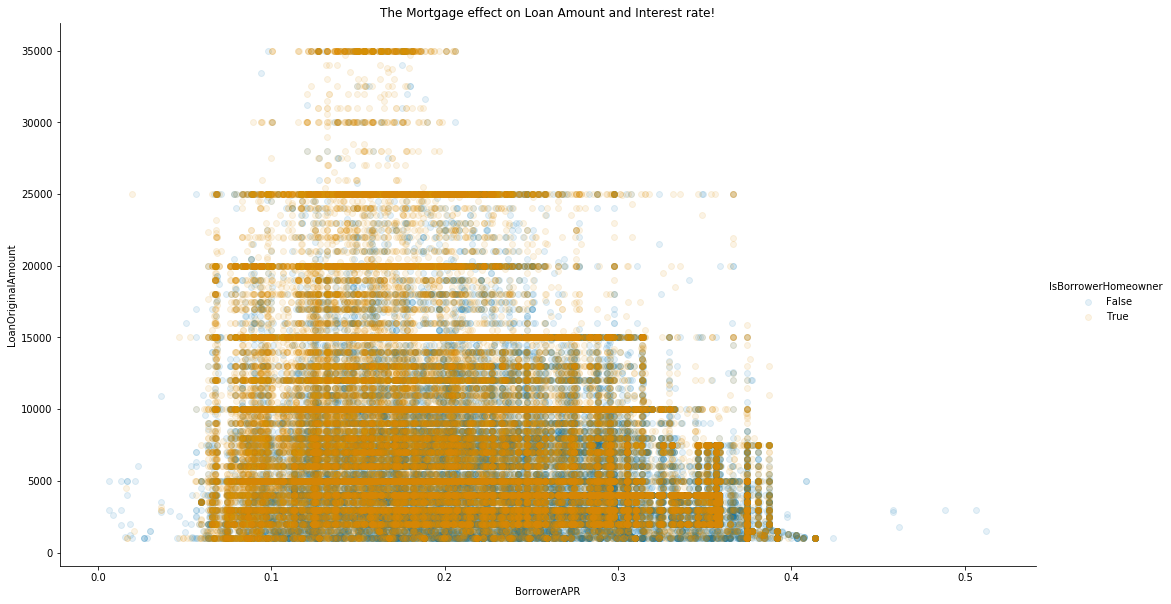

In [16]:
# I'll make FacetGrid to based on Which a borrower added a mortgage as a collateral or not 
# The plot will show the interest rates and Loan Amounts  

g = sb.FacetGrid(data = df, hue = 'IsBorrowerHomeowner', height = 8.27,  aspect = 14.70/8.27,
                 palette = 'colorblind');
g.map(plt.scatter, 'BorrowerAPR', 'LoanOriginalAmount',alpha =.1);
g.add_legend();
plt.title('The Mortgage effect on Loan Amount and Interest rate!');


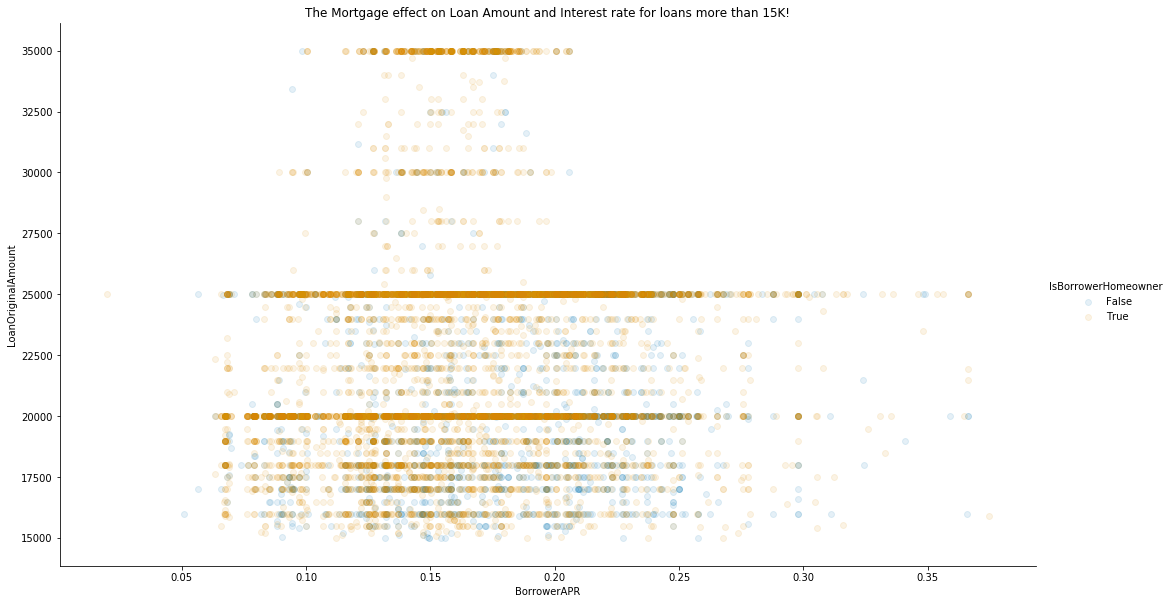

In [17]:
# I'll make FacetGrid to based on Which a borrower added a mortgage as a collateral or not 
# The plot will show the interest rates and Loan Amounts more than 15K 

sample=df.query('LoanOriginalAmount> 15000')
g = sb.FacetGrid(data = sample, hue = 'IsBorrowerHomeowner', height = 8.27,  aspect = 14.70/8.27,
                 palette = 'colorblind');
g.map(plt.scatter, 'BorrowerAPR', 'LoanOriginalAmount',alpha =.1);
g.add_legend();
plt.title('The Mortgage effect on Loan Amount and Interest rate for loans more than 15K!');


**So, With high Amount of loans, we need collateral**

# That's All, Thank you
## By: Ahmad Alashmony

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> For Loans with high values, It's required to have more collaterals, The Income or a Mortgage. And defaulting is not related to customer proprieties such as risk rating and Employment duration not to Loan proproties such as Amount, reason or even interest rates applied to it.

### Were there any interesting or surprising interactions between features?

> I thought that I might get a sign between defaulting and interest rate on high amount0 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!